<h2><center>Premier Modèle IA</center></h2>
<h4><center>(Régression linéaire simple, multiple et polynomiale)</center></h4>

### 1. Régression linéaire simple :

In [1]:
import pandas as pd
import numpy as np
import scipy as sp
# biliothèques graphiques
import matplotlib.pyplot as plt
#bibliothèques sklearn
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# Créer un dossier après vérification
import os
try: 
    os.makedirs('./graphiques')
except:
    print('dossier existant')
print('dossier créé')

dossier existant
dossier créé


##### 1.1- Récupération des données

In [3]:
reg_simple = pd.read_csv("./bdd/reg_simple.csv")
reg_simple.head(2)

,heure_rev,note
0,2,10
1,3,12


##### 1.2- Visualisation des données (le Dataset)

In [4]:
print('shape : ',reg_simple.shape)
reg_simple.info()

shape :  (27, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   heure_rev  27 non-null     int64
 1   note       27 non-null     int64
dtypes: int64(2)
memory usage: 560.0 bytes


In [5]:
# Récupération de la colonne en matrice
x = reg_simple[['heure_rev']]
print('shape : ',x.shape,'\ntype : ', type(x))
X = np.hstack((x, np.ones(x.shape)))
print('shape : ',X.shape,'\ntype : ', type(X), X[:5])

shape :  (27, 1) 
type :  <class 'pandas.core.frame.DataFrame'>
shape :  (27, 2) 
type :  <class 'numpy.ndarray'> [[2. 1.]
 [3. 1.]
 [4. 1.]
 [5. 1.]
 [6. 1.]]


In [6]:
y = reg_simple[['note']].values
print('shape : ',y.shape, y[:5])

shape :  (27, 1) [[10]
 [12]
 [20]
 [22]
 [21]]


In [7]:
# Theta de vecteur 2,1 (a et b) :
np.random.seed(0)
theta = np.random.randn(2,1)

# theta.shape
theta

array([[1.76405235],
       [0.40015721]])

##### 1.2- modele

In [8]:
# définition du modèle
def model(X, theta):
    return X.dot(theta)

# test de la fonction sur X et theta, et qu'il n'y a pas d'erreur de programmation 
model(X, theta)[:5]

array([[ 3.9282619 ],
       [ 5.69231425],
       [ 7.45636659],
       [ 9.22041894],
       [10.98447128]])

##### 1.3- Création du modèle (model(X,theta))

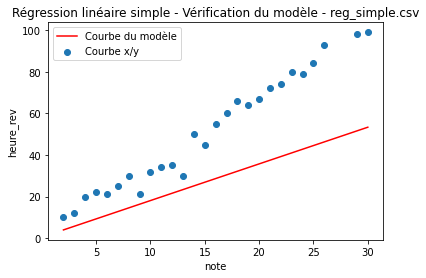

In [9]:
plt.scatter(x,y, label="Courbe x/y")
# Vérification du modèle avec matplotlib
# afficher le résultat du modèle par rapport à notre dataset x
plt.plot(x, model(X, theta), c='red', label="Courbe du modèle")
# On obtient une pente montante  (si a neg, la pente serait descendente) 

# titres et labels
plt.title("Régression linéaire simple - Vérification du modèle - reg_simple.csv")
plt.legend()
plt.xlabel("note")
plt.ylabel("heure_rev")
# sauvegarde :
plt.savefig('./graphiques/graph01_regLineaire_verif_model.png')
# affiche la figure a l'ecran
#plt.show()

##### 1.4- Fonction du coût (fonction_cout(X,y,theta))

In [10]:
# l'erreur chromatique moyenne
# définition de la fonction
def fonction_cout (X, y, theta):
    # varible m = à de longueur du vecteur y (autant d'exemple dans notre data)
    m = len(y)
    # m = le nb d'exemple dans notre dataset
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

In [11]:
# Test de la fonction
fonction_cout (X, y, theta)

376.1911774975494

##### 1.5- Gradient (gradient(X,y,theta))

In [12]:
def grad(X, y, theta):
    m = len(y)
    # X.T = transposée de X, produit matriciel : .dot()
    return 1/m * X.T.dot(model(X, theta) - y)

grad(X, y, theta)

array([[-464.18503787],
       [ -23.91475355]])

##### 1.6- Descente du gradient (descente_gradient(X,y,theta,alpha,n_iterations))

In [13]:
def descent_grad(X, y, theta, learning_rate, n_iterations):
    # Variable de 0 de longueur des itération
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = fonction_cout(X, y, theta)
    
    return theta, cost_history

##### 1.7- Evaluation du modèle en utilisant le coefficient de détermination

In [14]:
nbpas = 0.0001
nbit = 30

In [15]:
theta_final, cost_history = descent_grad(X, y, theta, learning_rate=nbpas, n_iterations=nbit)
theta_final
# C'est un vecteur avec a et b 

array([[2.69687026],
       [0.44820512]])

##### 1.8- Traçage de la courbe de la fonction du coût selon les itérations

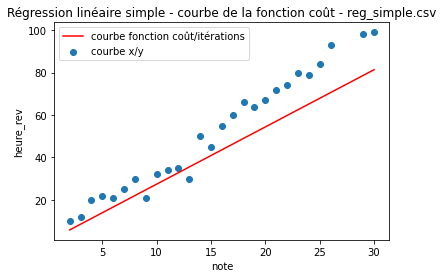

In [16]:
predictions = model(X, theta_final)
plt.scatter(x, y, label="courbe x/y")
plt.plot(x, predictions, c='r', label="courbe fonction coût/itérations")

# titres et labels
plt.title("Régression linéaire simple - courbe de la fonction coût - reg_simple.csv")
plt.legend()
plt.xlabel("note")
plt.ylabel("heure_rev")
plt.savefig('./graphiques/graph02_regLineaire_model.png')


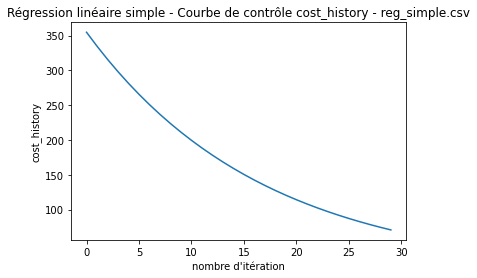

In [17]:
# Courbe de contrôle cost_history
plt.plot(range(nbit), cost_history)

# titres et labels
plt.title("Régression linéaire simple - Courbe de contrôle cost_history - reg_simple.csv")
plt.xlabel("nombre d'itération")
plt.ylabel("cost_history")
plt.savefig('./graphiques/graph03_regLineaire_contrôle.png')

In [18]:
# Coeff de détermination : plus il est proche de 1, plus il proche de 1, plus il est efficace
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y, predictions)

0.8092811830196187

In [19]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, predictions)
print("MSE= ", mse)
sc=r2_score(y, predictions)
print("Score= ", sc)

MSE=  141.36476372475866
Score=  0.8092811830196187


###  1.9 ***<u>Scikit-Learn</u>***  :Régression linéaire 

In [20]:
#bibliothèques sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression

In [21]:
X = reg_simple[['heure_rev']]
y = reg_simple[['note']]
x.head(), y.head()

(   heure_rev
 0          2
 1          3
 2          4
 3          5
 4          6,
    note
 0    10
 1    12
 2    20
 3    22
 4    21)

In [22]:
# Fractionnement le jeu de données en jeu d'entraînement et jeu de test (20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [23]:
# Création du modèle LinearRegression et entraînement sur les données d'entraînement
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [24]:
# Predire les résultats du modèle sur l'ensemble du test
y_pred = regressor.predict(X_test)


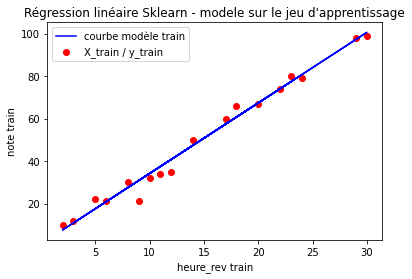

In [25]:
# Visualisation des résultats du modèle sur les données d'entraînement
plt.scatter(X_train, y_train, color = 'red', label="X_train / y_train")
plt.plot(X_train, regressor.predict(X_train), color = 'blue', label="courbe modèle train")

plt.title("Régression linéaire Sklearn - modele sur le jeu d'apprentissage")
plt.legend()
plt.xlabel('heure_rev train')
plt.ylabel('note train')
plt.savefig('./graphiques/graph05_regLineaireSklearn_model_train.png')
plt.show()

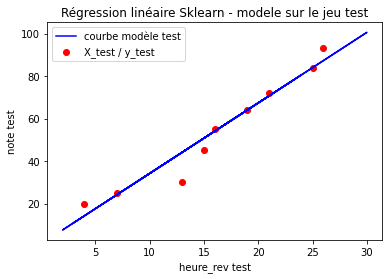

In [26]:
# Visualisation des résultats du modèle sur les données de test
plt.scatter(X_test, y_test, color = 'red', label="X_test / y_test")
plt.plot(X_train, regressor.predict(X_train), color = 'blue', label="courbe modèle test")

plt.title("Régression linéaire Sklearn - modele sur le jeu test")
plt.legend()
plt.xlabel('heure_rev test')
plt.ylabel('note test')
plt.savefig('./graphiques/graph06_regLineaireSklearn_model_test.png')
plt.show()

plt.show()

In [27]:
# Evaluez votre modèle par le mean_squared_error 
mse = mean_squared_error(y_test, y_pred)
print(mse)

sc=r2_score(y_test, y_pred)
print("Score= ", sc)

33.46925691063803
Score=  0.9452276990107952


### 2. Régression linéaire multiple :

###### L’exemple développé à partir de deux variables (régression simple) permet de comprendre la logique de la théorie de la régression mais il ne peut être généralisé de la sorte aux régressions multiples. Le système à deux équations à deux inconnus présenté se résolvait facilement comme on l’a vu. Les équations se compliquent avec plusieurs régresseurs, deux méthodes distinctes permettent de résoudre les équations. La première repose sur la connaissance des coefficients de corrélation linéaire simple de toutes les paires de variables entre elles, de la moyenne arithmétique et des écarts-types de toutes les variables. La seconde repose sur des calculs matriciels. En utilisant la méthode matricielle :

##### 2.1 - Implémentez un modèle de régression multiple sur la base de données issue du fichier nommé boston_house_prices.csv (sans utiliser la bibliothèque Scikit-learn).

In [28]:
import pandas as pd
import numpy as np
import scipy as sp
# biliothèques graphiques
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
#bibliothèques sklearn
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
bhp = pd.read_csv("./bdd/boston_house_prices.csv")
bhp.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


In [30]:
bhp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [31]:
bhp.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### Déterminer les corrélations les plus fortes

In [32]:
# Déterminer les corrélations les plus fortes
bhp.corrwith(bhp['MEDV'], method = 'pearson').sort_values(ascending = False)

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
dtype: float64

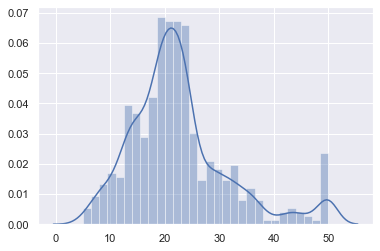

In [33]:
#import seaborn as sns

y = bhp.iloc[:,-1].values
plt.figure(5)
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(y, bins=30)
plt.show()

# correlation_matrix = bhp.corr().round(2)
# annot = True to print the values inside the square
# sns.heatmap(data=correlation_matrix, annot=True)

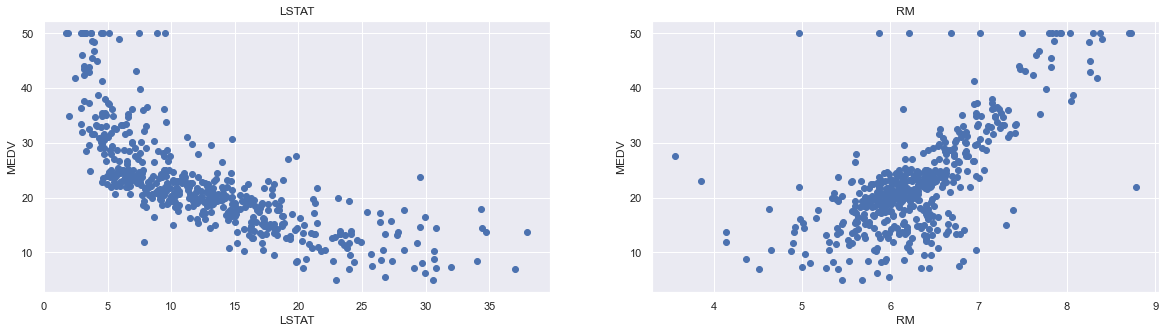

In [34]:
# On affiche RM et LSTAT
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bhp['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bhp[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
plt.savefig('./graphiques/graph10_regLineaireMulti_BHP.png')

Les régression les plus fortes avec MEDV : RM et LSTAT

In [35]:
# Récupération de la colonne en matrice
x1= bhp[['RM']]
x2= bhp[['LSTAT']]

X = np.hstack((x1, x2, np.ones(x1.shape)))
# print('shape : ',X.shape,'\ntype : ', type(X), X[:5])

y = np.array(bhp[['MEDV']])
# print('shape : ',y.shape, y[:5])

In [36]:
# Theta de vecteur 3,1 :
np.random.seed(0)
theta = np.random.randn(3,1)
theta.shape
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

In [37]:
# définition du modèle
def model(X, theta):
    return X.dot(theta)
# test de la fonction sur X et theta, et qu'il n'y a pas d'erreur de programmation 
model(X, theta)

array([[14.57016506],
       [15.96315498],
       [15.26608764],
       [14.50003849],
       [15.71925802],
       [14.40641362],
       [16.55817479],
       [19.5294796 ],
       [22.88882199],
       [18.41279653],
       [20.41131471],
       [16.88901469],
       [17.65371199],
       [14.77838393],
       [15.83801404],
       [14.65955093],
       [14.08142309],
       [17.41571778],
       [15.28124535],
       [15.59523908],
       [19.21581407],
       [17.03548442],
       [19.30449043],
       [19.18829957],
       [17.95154658],
       [17.46226258],
       [17.15950253],
       [18.56067908],
       [17.55827024],
       [17.5459067 ],
       [20.10032195],
       [16.90811383],
       [22.56320569],
       [18.37848518],
       [19.8715987 ],
       [15.31838233],
       [15.84836148],
       [14.80782293],
       [15.5566668 ],
       [14.34134235],
       [14.16175293],
       [14.85813325],
       [14.18609029],
       [14.91243674],
       [15.50627301],
       [15

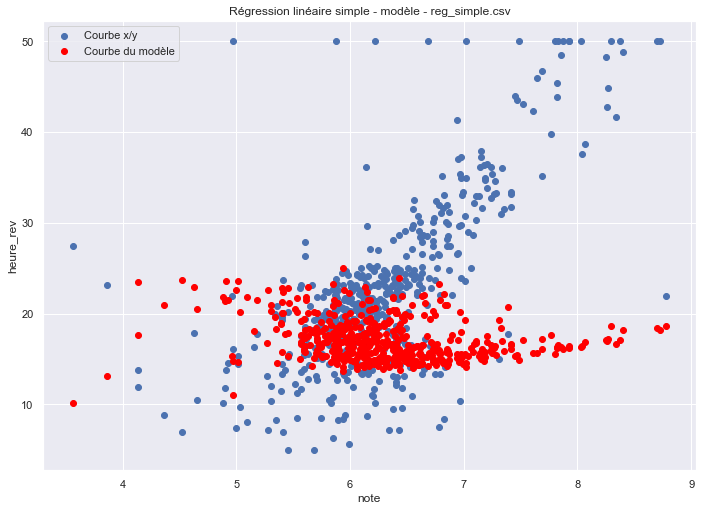

In [38]:
#Création du modèle (model(X,theta))
plt.scatter(x1,y, label="Courbe x/y")
# Vérification du modèle avec matplotlib
# afficher le résultat du modèle par rapport à notre dataset x
plt.scatter(x1, model(X, theta), c='red', label="Courbe du modèle")
# On obtient une pente montante  (si a neg, la pente serait descendente) 

# titres et labels
plt.title("Régression linéaire simple - modèle - reg_simple.csv")
plt.legend()
plt.xlabel("note")
plt.ylabel("heure_rev")
# sauvegarde :
plt.savefig('./graphiques/graph08_regLineaireMultiple_model.png')
# affiche la figure a l'ecran
#plt.show()

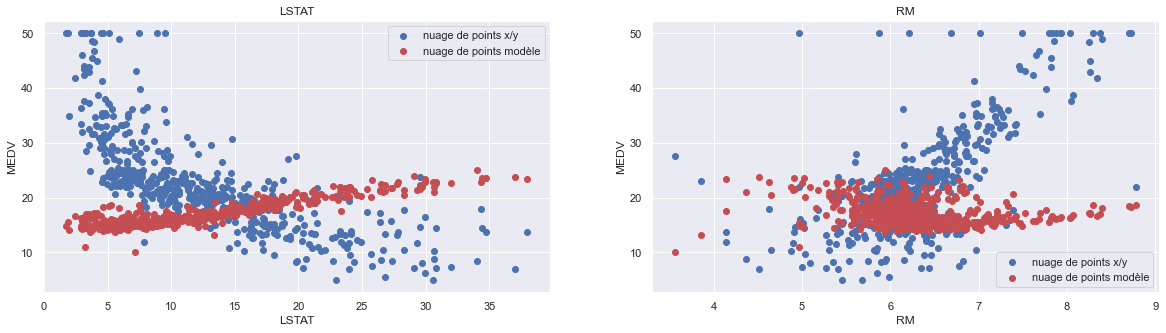

In [39]:
# On affiche RM et LSTAT
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bhp['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    xfig = bhp[col]
    yfig = target
    plt.scatter(xfig, yfig, marker='o', label="nuage de points x/y")
    plt.scatter(xfig, model(X, theta), c='r', label="nuage de points modèle")
    plt.legend()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
plt.savefig('./graphiques/graph08_regLineaireMultiple_model2.png')

In [40]:
# définition de la fonction coût
def fonction_cout (X, y, theta):
    # varible m = à de longueur du vecteur y (autant d'exemple dans notre data)
    m = len(y)
    # m = le nb d'exemple dans notre dataset
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

# Test de la fonction coût
fonction_cout (X, y, theta)

70.92265485889901

In [41]:
# Fonction gradient
def grad(X, y, theta):
    m = len(y)
    # X.T = transposée de X, produit matriciel : .dot()
    return 1/m * X.T.dot(model(X, theta) - y)

grad(X, y, theta)

array([[-38.81023622],
       [ -5.08729593],
       [ -5.40442984]])

In [42]:
# fonction descente de gradient
def descent_grad(X, y, theta, learning_rate, n_iterations):
    # Variable de 0 de longueur des itération
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = fonction_cout(X, y, theta)
    
    return theta, cost_history

In [43]:
# Coeff de détermination
nbpas = 0.0007
nbit = 900

theta_final, cost_history = descent_grad(X, y, theta, learning_rate=nbpas, n_iterations=nbit)
theta_final
# C'est un vecteur avec a et b 

array([[ 4.71485191],
       [-0.66803041],
       [ 1.36623339]])

In [44]:
#from mpl_toolkits.mplot3d import Axes3D

In [45]:
# Courbe fonction coût selon les itérations : 
y_predictions = model(X, theta_final)

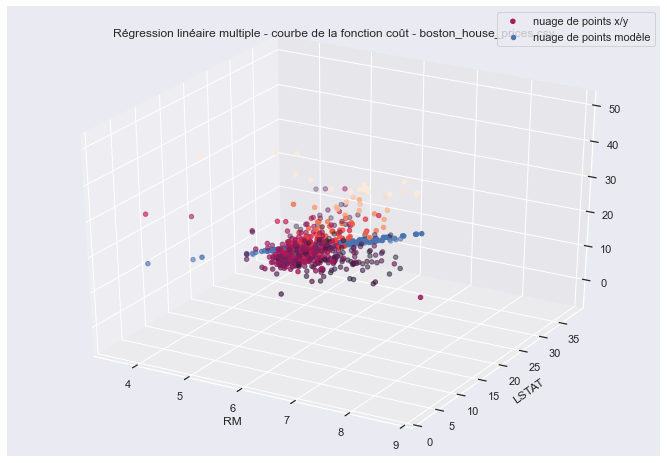

In [46]:

ax = plt.axes(projection='3d')
ax.scatter(x1, x2, y, c=y, label="nuage de points x/y")
ax.scatter(x1, x2, y_predictions, c='b', label="nuage de points modèle")

# titres et labels
plt.title("Régression linéaire multiple - courbe de la fonction coût - boston_house_prices.csv")
plt.legend()
plt.xlabel("RM")
plt.ylabel("LSTAT")
plt.savefig('./graphiques/graph11_3DregLineaireMulti_model.png')

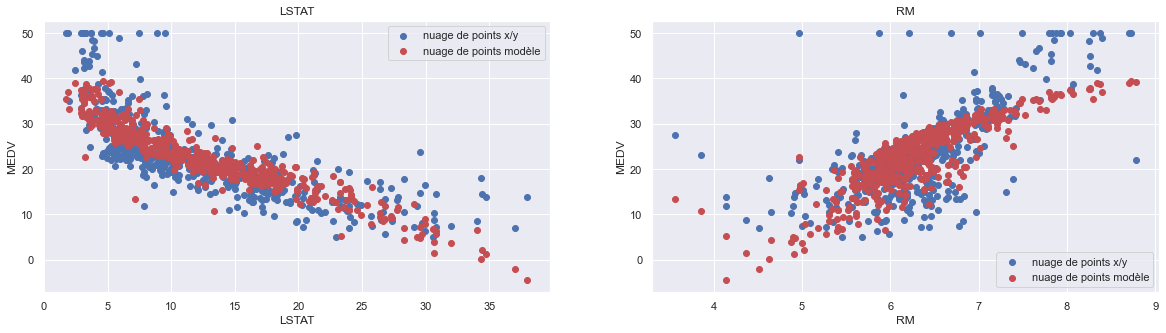

In [47]:
# On affiche RM et LSTAT
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = bhp['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = bhp[col]
    y = target
    plt.scatter(x, y, marker='o', label="nuage de points x/y")
    plt.scatter(x, y_predictions, c='r', label="nuage de points modèle")
    plt.legend()
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')
    
plt.savefig('./graphiques/graph12_regLineaireMulti_model.png')

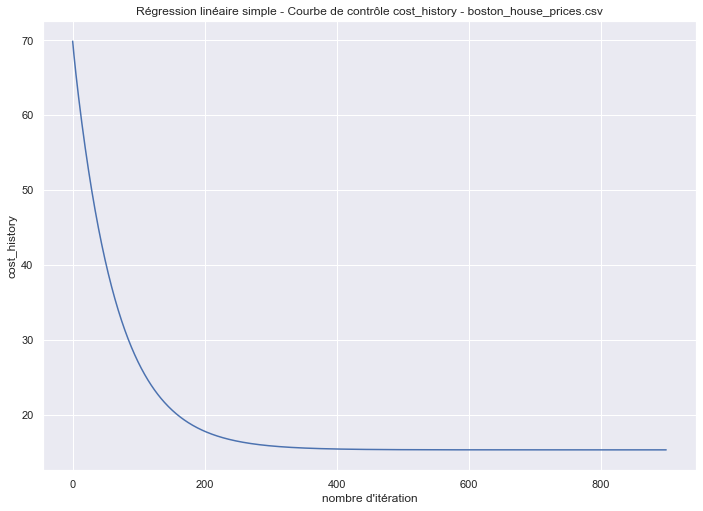

In [48]:
# Courbe de contrôle cost_history
plt.plot(range(nbit), cost_history)

# titres et labels
plt.title("Régression linéaire simple - Courbe de contrôle cost_history - boston_house_prices.csv")
plt.xlabel("nombre d'itération")
plt.ylabel("cost_history")
plt.savefig('./graphiques/graph13_regLineaireMulti_boston_house_prices.png')

##### 2.2 - Évaluez les résultats obtenus en utilisant la fonction mean_squared_error de sklearn

In [49]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, y_predictions)
print("MSE= ", mse)
# mae = mean_absolute_error(y_test, y_pred)
sc=r2_score(y, y_predictions)
print("Score= ", sc)

MSE=  30.557314679880797
Score=  0.6380303797931179


### 2.3 ***<u>Scikit-Learn</u>*** :Régression linéaire multiple de boston_house_prices.csv 

In [50]:
#bibliothèques sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression


In [51]:
# Récupération de la colonne en matrice
x1= bhp[['RM']]
x2= bhp[['LSTAT']]
X = np.hstack((x1, x2, np.ones(x1.shape)))
print('shape : ',X.shape,'\ntype : ', type(X), X[:5])

y = np.array(bhp[['MEDV']])
print('shape : ',y.shape, y[:5])

shape :  (506, 3) 
type :  <class 'numpy.ndarray'> [[6.575 4.98  1.   ]
 [6.421 9.14  1.   ]
 [7.185 4.03  1.   ]
 [6.998 2.94  1.   ]
 [7.147 5.33  1.   ]]
shape :  (506, 1) [[24. ]
 [21.6]
 [34.7]
 [33.4]
 [36.2]]


Fractionnement du jeu de données en jeu d'entraînement et jeu de test (20% pour le test)

In [52]:
#from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

Standarisastion des variables d'entrainement et de test

In [53]:
#from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
# X_train, X_test

Créer du modèle LinearRegression multiple et entraînez le sur les données d'entraînement

In [54]:
#from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

Predire les résultats du modèle sur l'ensemble du test

In [55]:
y_pred_train = regressor.predict(X_train)
y_pred_test = regressor.predict(X_test)

Visualisation des résultats du modèle sur les données d'entraînement en 3D avec les deux variable R&D Spend et Marketing Spend

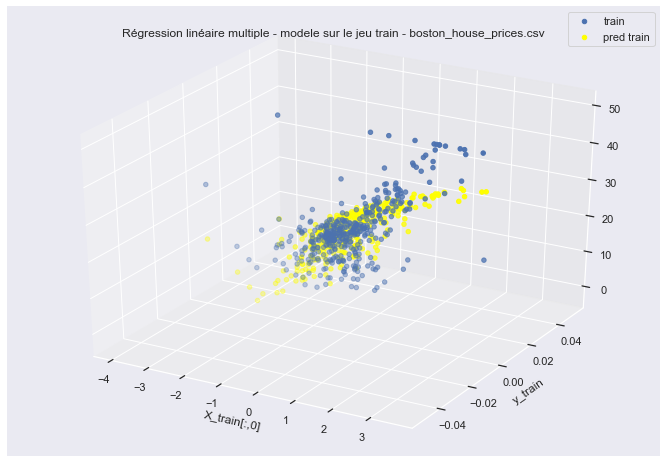

In [56]:
#from mpl_toolkits.mplot3d import Axes3D

fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
plt.xlabel("X_train[:,0]")
plt.ylabel("y_train")
ax.scatter(X_train[:,0],X_train[:,2],y_train, label="train")
ax.scatter(X_train[:,0],X_train[:,2],y_pred_train,color = 'yellow', label="pred train")

# titres et labels
plt.title("Régression linéaire multiple - modele sur le jeu train - boston_house_prices.csv")
plt.legend()

plt.savefig('./graphiques/graph14_3DregLineaireMultiSklearn_model_xtrain.png')

Visualisation des résultats du modèle sur les données de test en 3D avec les deux variable R&D Spend et Marketing Spend

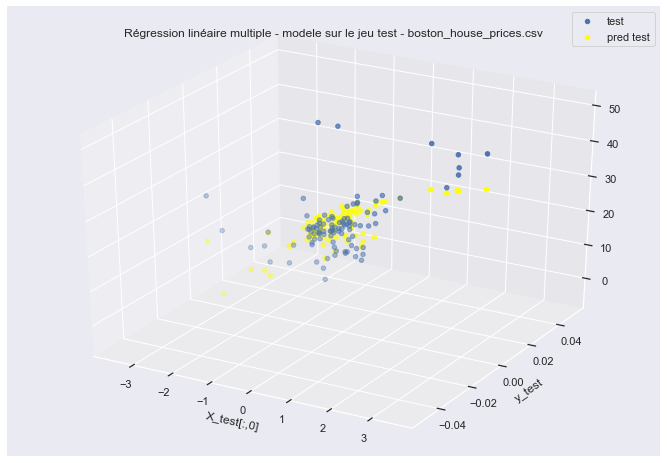

In [57]:
#from mpl_toolkits.mplot3d import Axes3D
# %matplotlib notebook
fig= plt.figure()
ax=fig.add_subplot(111,projection='3d')
plt.xlabel("X_test[:,0]")
plt.ylabel("y_test")
ax.scatter(X_test[:,0],X_test[:,2],y_test, label="test")
ax.scatter(X_test[:,0],X_test[:,2],y_pred_test,color = 'yellow', label="pred test")

# titres et labels
plt.title("Régression linéaire multiple - modele sur le jeu test - boston_house_prices.csv")
plt.legend()

plt.savefig('./graphiques/graph15_3DregLineaireMultiSklearn_model_xtest.png')

Evaluez votre modèle par le mean_squared_error

In [58]:
mse2 = mean_squared_error(y_test, y_pred_test)
print(mse2)

37.38310563877995


In [59]:
sc=r2_score(y_test, y_pred_test)
print("Score= ", sc)

Score=  0.5409084827186418


In [60]:
mse2 = mean_squared_error(y_train, y_pred_train)
print(mse2)

28.790276482053436


In [61]:
sc=r2_score(y_train, y_pred_train)
print("Score= ", sc)

Score=  0.6618625964841895


### 3. Régression Polynomiale :

##### 3.1 - En utilisant les bibliothèques adéquates de Python, implémentez un modèle de régression polynomiale sur le jeu de données issu du fichier **Position_Salaries.csv **(sans utiliser la bibliothèque Scikit-learn).

In [62]:
import pandas as pd
import numpy as np
import scipy as sp
# biliothèques graphiques
import matplotlib.pyplot as plt
#bibliothèques sklearn
from sklearn.metrics import mean_squared_error, r2_score


In [63]:
position_salaire = pd.read_csv("./bdd/Position_Salaries.csv")
position_salaire.head(5)

,Position,Level,Salary
0,Project Analyste,1,45000
1,Ingenieur,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [64]:
print('shape : ',reg_simple.shape)
position_salaire.info()

shape :  (27, 2)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


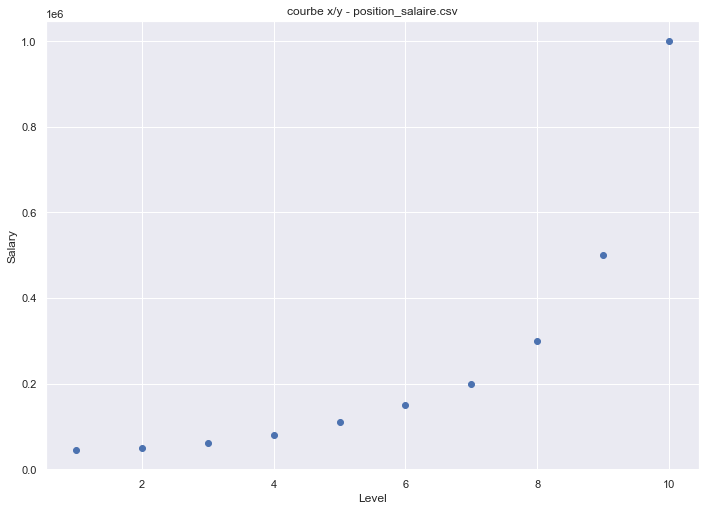

In [65]:
plt.scatter(position_salaire['Level'], position_salaire['Salary'])
# titres et labels
plt.title("courbe x/y - position_salaire.csv")
plt.xlabel("Level")
plt.ylabel("Salary")
plt.savefig('./graphiques/graph20_3DregPoly_model.png')

In [66]:
# Récupération de la colonne en matrice
x = position_salaire[['Level']]
# carré : x**2 ou x.pow(2)
X = np.hstack((x**2, x, np.ones(x.shape)))
print('shape : ', X.shape, X[:3])


shape :  (10, 3) [[1. 1. 1.]
 [4. 2. 1.]
 [9. 3. 1.]]


In [67]:
y = np.array(position_salaire[['Salary']])
print('shape : ',y.shape, y[:5])

shape :  (10, 1) [[ 45000]
 [ 50000]
 [ 60000]
 [ 80000]
 [110000]]


In [68]:
# Theta de vecteur 3,1 :
np.random.seed(0)
theta = np.random.randn(3,1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

In [69]:
# définition du modèle
def model(X, theta):
    return X.dot(theta)

# test de la fonction sur X et theta, et qu'il n'y a pas d'erreur de programmation 
model(X, theta)[:3]

array([[ 3.14294754],
       [ 8.83526178],
       [18.05568072]])

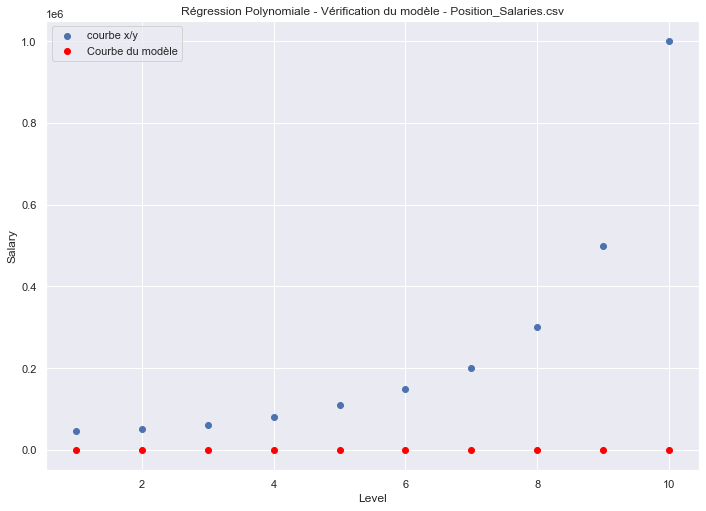

In [70]:
# plt.scatter(x,y)
plt.scatter(position_salaire['Level'], position_salaire['Salary'], label="courbe x/y")

# Vérification du modèle avec matplotlib
# afficher le résultat du modèle par rapport à notre dataset x
plt.scatter(x, model(X, theta), c='red', label="Courbe du modèle")

# titres et labels
plt.title("Régression Polynomiale - Vérification du modèle - Position_Salaries.csv")
plt.legend()
plt.xlabel("Level")
plt.ylabel("Salary")
# sauvegarde :
plt.savefig('./graphiques/graph21_regPolynomiale_verif_model_Position_Salaries.png')


In [71]:
# définition de la fonction coût
def fonction_cout (X, y, theta):
    m = len(y)
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)
# Test de la fonction
fonction_cout (X, y, theta)

71423491244.89627

In [72]:
# gradient
def grad(X, y, theta):
    m = len(y)
    # X.T = transposée de X, produit matriciel : .dot()
    return 1/m * X.T.dot(model(X, theta) - y)

grad(X, y, theta)

array([[-17966872.39722404],
       [ -2038945.58505391],
       [  -249428.90438205]])

In [73]:
# descente de gradient
def descent_grad(X, y, theta, learning_rate, n_iterations):
    # Variable de 0 de longueur des itération
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = fonction_cout(X, y, theta)
    
    return theta, cost_history

In [74]:
# Evaluation du modèle en utilisant le coefficient de détermination
learning_rate = 0.00001
n_iterations = 200
theta_final, cost_history = descent_grad(X, y, theta, learning_rate, n_iterations)
theta_final

array([[6975.51512428],
       [ 617.38417341],
       [  58.63976152]])

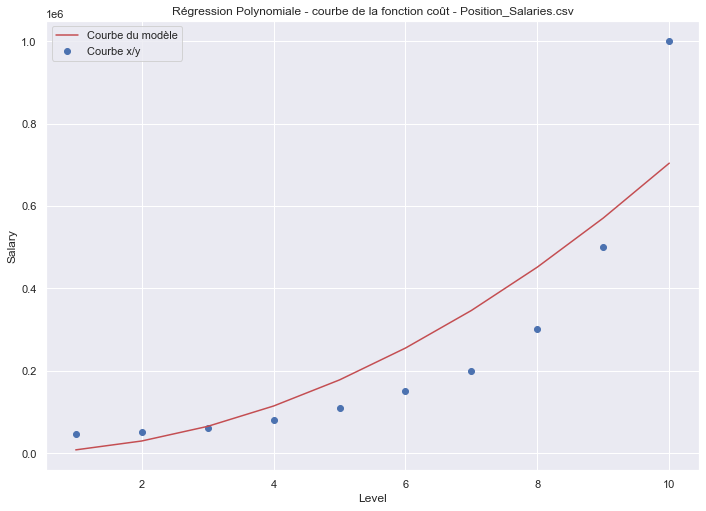

In [75]:
# Traçage de la courbe de la fonction du coût selon les itérations
predictions = model(X, theta_final)
# plt.scatter(x, y)
plt.scatter(position_salaire['Level'], position_salaire['Salary'], label="Courbe x/y")
plt.plot(x, predictions, c='r', label="Courbe du modèle")

# titres et labels
plt.title("Régression Polynomiale - courbe de la fonction coût - Position_Salaries.csv")
plt.legend()
plt.xlabel("Level")
plt.ylabel("Salary")
# sauvegarde :
plt.savefig('./graphiques/graph22_regPolynomiale_model_Position_Salaries.png')


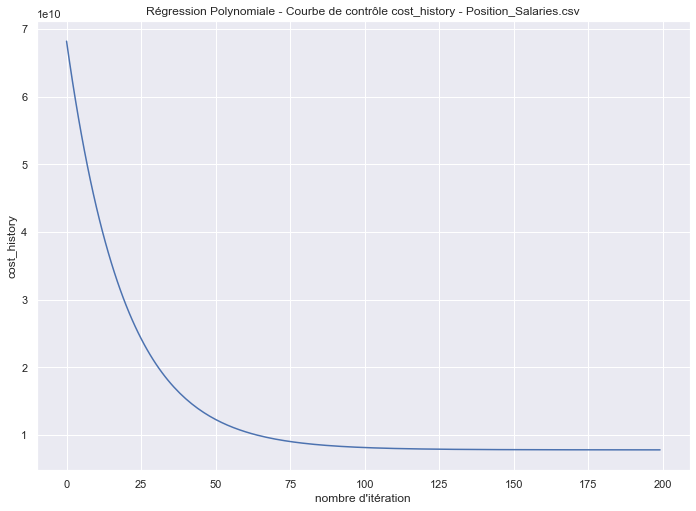

In [76]:
# Courbe de contrôle cost_history
plt.plot(range(n_iterations), cost_history)

# titres et labels
plt.title("Régression Polynomiale - Courbe de contrôle cost_history - Position_Salaries.csv")
plt.xlabel("nombre d'itération")
plt.ylabel("cost_history")
plt.savefig('./graphiques/graph23_regPolynomiale_Position_Salaries_contrôle.png')

##### 3.1b - Évaluation du modèle : Position_Salaries

In [77]:
# Coeff de détermination : plus il est proche de 1, plus il proche de 1, plus il est efficace
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y, predictions)

0.8070860777900862

In [78]:
#from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, predictions)
print("MSE= ", mse)
sc=r2_score(y_test, y_pred_test)
print("Score= ", sc)

MSE=  15560871021.776617
Score=  0.5409084827186418


### 3.1c **<u>Scikit-Learn</u>** :Régression polynomiale de Position_Salaire.csv 

In [113]:
#bibliothèques sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [114]:
# Récupération de la colonne en matrice
X = position_salaire[['Level']].values
# carré : x**2 ou x.pow(2)
#X = np.hstack((x**2, x, np.ones(x.shape)))
print('shape : ', X.shape, X[:3])
y = np.array(position_salaire[['Salary']])
print('shape : ',y.shape, y[:5])

shape :  (10, 1) [[1]
 [2]
 [3]]
shape :  (10, 1) [[ 45000]
 [ 50000]
 [ 60000]
 [ 80000]
 [110000]]


Créer votre modèle LinearRegression et entraînez le sur le jeu de données

In [115]:
#from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(x, y)

LinearRegression()

Visualisation des résultats du modèle LinearRegression sur le jeu de données

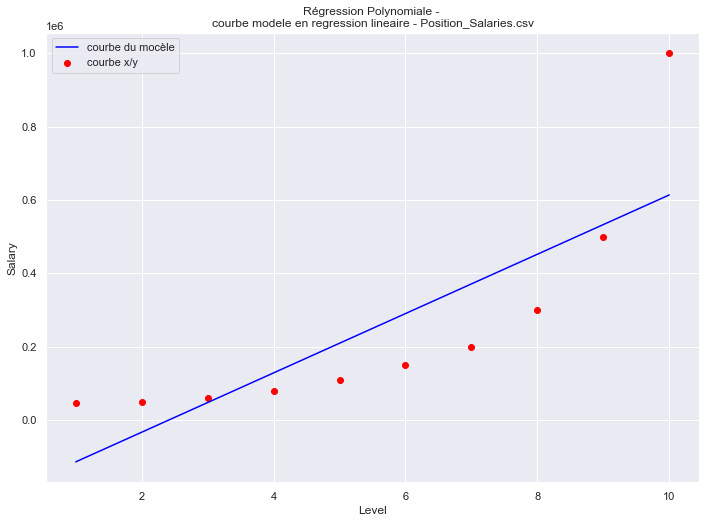

In [116]:
# Visualising the Linear Regression results
plt.scatter(x, y, color = 'red', label="courbe x/y")
plt.plot(x, lin_reg.predict(x), color = 'blue', label="courbe du mocèle")
#plt.title('Linear Regression')
#plt.xlabel('Position level')
#plt.ylabel('Salary')

# titres et labels
plt.title("Régression Polynomiale - \ncourbe modele en regression lineaire - Position_Salaries.csv")
plt.legend()
plt.xlabel("Level")
plt.ylabel("Salary")
# sauvegarde :
plt.savefig('./graphiques/graph24_regPolynomiale_model_Position_Salaries.png')

plt.show()

Créer votre modèle Regression polynomiale et entraînez le sur le jeu de données, essayer avec différentes valeurs pour le degré (1..5). Visualiser dans la même figure les rélutats du modèle pour les différents degrés. Quelle est la meilleure valeur pour le degré ?

degré = 1 , mse2= 6758833333.333334  Score=  0.6690412331929895
degré = 2 , mse2= 6758833333.333334  Score=  0.9162082221443942
degré = 3 , mse2= 6758833333.333334  Score=  0.9812097727913367
degré = 4 , mse2= 6758833333.333334  Score=  0.9973922891706614


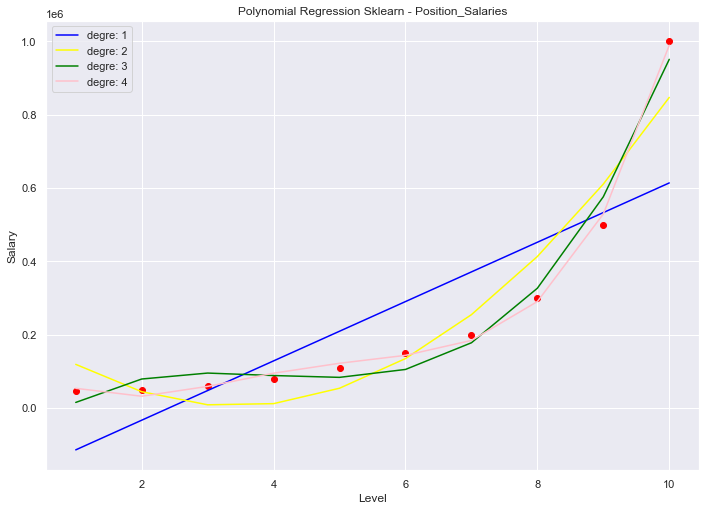

In [123]:
#from sklearn.preprocessing import PolynomialFeatures

colors=['blue','yellow','green','pink','black']
plt.scatter(X, y, color = 'red')

# print(X)
# print(y)
plt.title('Polynomial Regression Sklearn - Position_Salaries')
plt.xlabel('Level')
plt.ylabel('Salary')
for i in range(1,5):

    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)
    y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))
    mse = mean_squared_error(y, y_pred)
    
    sc=r2_score(y, y_pred)    
    plt.plot(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = colors[i-1],label='degre: %s' %i)
 
    print("degré =",i, ", mse2=", mse2, " Score= ", sc)     
   
plt.legend() 
plt.savefig('./graphiques/graph25_regPolynomiale_Sklearn_Position_Salaries.png')

plt.show()

Faire la prédiction de la valeur 6 avec le modèle de régression linéaire simple et de régression polynomiale, qu'est ce que vous remarquez ?

In [124]:
valeur=np.array([6]).reshape(-1, 1)

# Predicting a new result with Linear Regression

print('Predicting a new result with Linear Regression')
print(lin_reg.predict(valeur))


print("=========================================================")
# Predicting a new result with Polynomial Regression

print('Predicting a new result with Polynomial Regression')
print(lin_reg_2.predict(poly_reg.fit_transform(valeur)))

Predicting a new result with Linear Regression
[[289939.39393939]]
Predicting a new result with Polynomial Regression
[[143275.05827508]]


In [133]:
poly_reg = PolynomialFeatures(degree = 4)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))
mse2 = mean_squared_error(y, y_pred)
print(mse2)
sc=r2_score(y, y_pred)
print("Score= ", sc)

210343822.8438184
Score=  0.9973922891706614


##### 3.2 - Appliquez le même modèle sur le jeu de données issu du fichier data/qualite_vin_rouge.csv

In [86]:
import pandas as pd
import numpy as np
import scipy as sp
# biliothèques graphiques
import matplotlib.pyplot as plt
#bibliothèques sklearn
from sklearn.metrics import mean_squared_error, r2_score


In [87]:
qvr = pd.read_csv("./bdd/qualite-vin-rouge.csv")
qvr.head(5)

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [88]:
qvr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   acidité fixe               1599 non-null   float64
 1   acidité volatile           1599 non-null   float64
 2   acide citrique             1599 non-null   float64
 3   sucre résiduel             1599 non-null   float64
 4   chlorures                  1599 non-null   float64
 5   dioxyde de soufre libre    1599 non-null   float64
 6   anhydride sulfureux total  1599 non-null   float64
 7   densité                    1599 non-null   float64
 8   pH                         1599 non-null   float64
 9   sulphates                  1599 non-null   float64
 10  alcool                     1599 non-null   float64
 11  qualité                    1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
qvr.describe()

,acidité fixe,acidité volatile,acide citrique,sucre résiduel,chlorures,dioxyde de soufre libre,anhydride sulfureux total,densité,pH,sulphates,alcool,qualité
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [90]:
# Déterminer les corrélations les plus fortes
qvr.corrwith(qvr['qualité'], method = 'pearson').sort_values(ascending = False)

qualité                      1.000000
alcool                       0.476166
sulphates                    0.251397
acide citrique               0.226373
acidité fixe                 0.124052
sucre résiduel               0.013732
dioxyde de soufre libre     -0.050656
pH                          -0.057731
chlorures                   -0.128907
densité                     -0.174919
anhydride sulfureux total   -0.185100
acidité volatile            -0.390558
dtype: float64

In [91]:
# Récupération de la colonne en matrice
x = qvr[['alcool']]
# carré : x**2 ou x.pow(2)
X = np.hstack((x**2, x, np.ones(x.shape)))
print('shape : ', X.shape, X[:3])

shape :  (1599, 3) [[88.36  9.4   1.  ]
 [96.04  9.8   1.  ]
 [96.04  9.8   1.  ]]


In [92]:
y = np.array(qvr[['qualité']])
print('shape : ',y.shape, y[:5])

shape :  (1599, 1) [[5]
 [5]
 [5]
 [6]
 [5]]


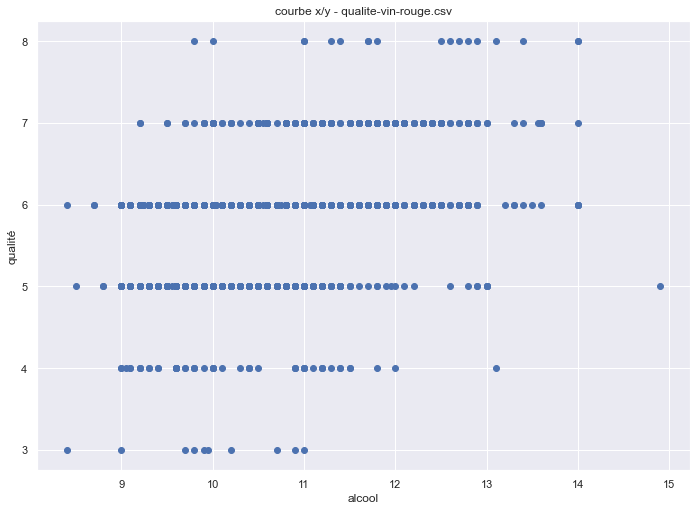

In [93]:
plt.scatter(qvr['alcool'], qvr['qualité'])
# titres et labels
plt.title("courbe x/y - qualite-vin-rouge.csv")
plt.xlabel("alcool")
plt.ylabel("qualité")
plt.savefig('./graphiques/graph40_courbe_x-y_qualite-vin-rouge.png')
plt.show()

In [94]:
np.random.seed(0)
theta = np.random.randn(3,1)
theta

array([[1.76405235],
       [0.40015721],
       [0.97873798]])

In [95]:
# définition du modèle
def model(X, theta):
    return X.dot(theta)

# test de la fonction sur X et theta, et qu'il n'y a pas d'erreur de programmation 
model(X, theta)[:3]

array([[160.61188103],
       [174.31986593],
       [174.31986593]])

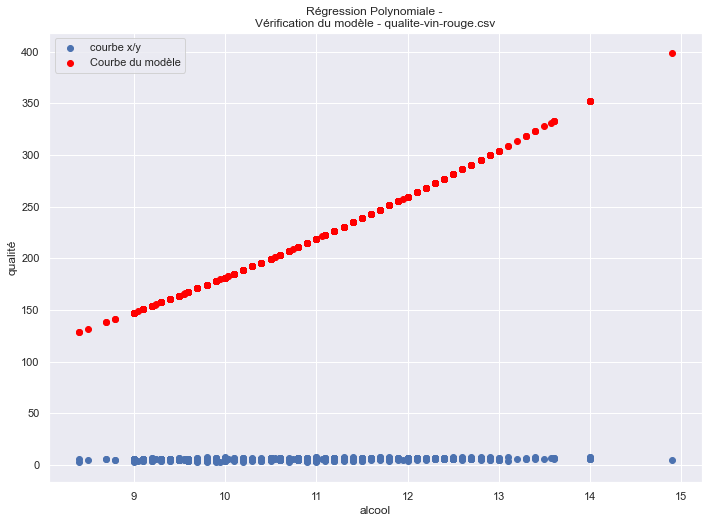

In [96]:
# plt.scatter(x,y)
plt.scatter(qvr['alcool'], qvr['qualité'], label="courbe x/y")

# Vérification du modèle avec matplotlib
# afficher le résultat du modèle par rapport à notre dataset x
plt.scatter(x, model(X, theta), c='red', label="Courbe du modèle")

# titres et labels
plt.title("Régression Polynomiale - \nVérification du modèle - qualite-vin-rouge.csv")
plt.legend()
plt.xlabel("alcool")
plt.ylabel("qualité")
plt.savefig('./graphiques/graph41_regPolynomiale_verif_model_qualite-vin-rouge.png')

In [97]:
# l'erreur chromatique moyenne
# définition de la fonction
def fonction_cout (X, y, theta):
    # varible m = à de longueur du vecteur y (autant d'exemple dans notre data)
    m = len(y)
    # m = le nb d'exemple dans notre dataset
    return 1/(2*m) * np.sum((model(X, theta) - y)**2)

# Test de la fonction
fonction_cout (X, y, theta)

19496.615020540128

In [98]:
def descent_grad(X, y, theta, learning_rate, n_iterations):
    # Variable de 0 de longueur des itération
    cost_history = np.zeros(n_iterations)
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta)
        cost_history[i] = fonction_cout(X, y, theta)
    
    return theta, cost_history

In [99]:
learning_rate = 0.00001
n_iterations = 50
theta_final, cost_history = descent_grad(X, y, theta, learning_rate, n_iterations)
theta_final

array([[0.0212823 ],
       [0.23851944],
       [0.96357297]])

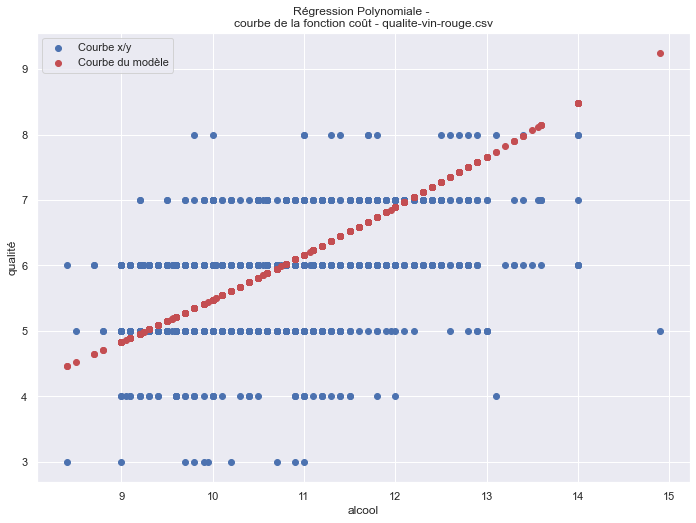

In [100]:
# Traçage de la courbe de la fonction du coût selon les itérations
predictions = model(X, theta_final)
plt.scatter(qvr['alcool'], qvr['qualité'], label="Courbe x/y")
plt.scatter(x, predictions, c='r', label="Courbe du modèle")

# titres et labels
plt.title("Régression Polynomiale - \ncourbe de la fonction coût - qualite-vin-rouge.csv")
plt.legend()
plt.xlabel("alcool")
plt.ylabel("qualité")
plt.savefig('./graphiques/graph42_regPolynomiale_model_qualite-vin-rouge.png')

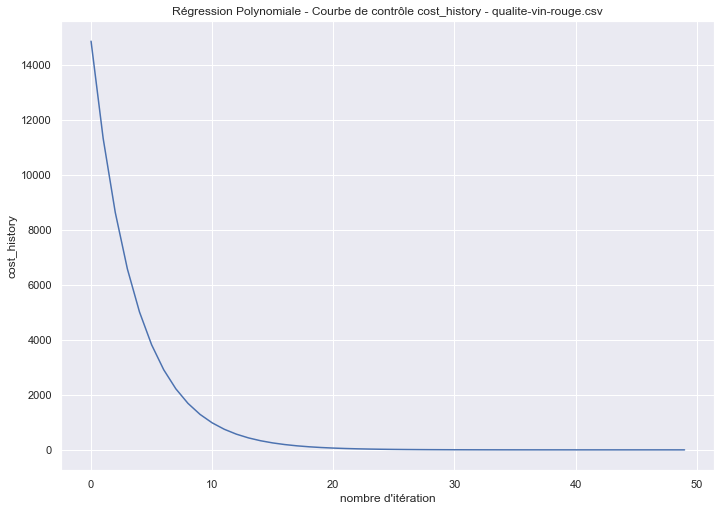

In [101]:
# Courbe de contrôle cost_history
plt.plot(range(n_iterations), cost_history)


# titres et labels
plt.title("Régression Polynomiale - Courbe de contrôle cost_history - qualite-vin-rouge.csv")
plt.xlabel("nombre d'itération")
plt.ylabel("cost_history")
plt.savefig('./graphiques/graph43_regLineaire_contrôle qualite-vin-rouge.png')

##### 3.3 - Évaluation du modèle : qualite-vin-rouge

In [102]:
# Coeff de détermination : plus il est proche de 1, plus il proche de 1, plus il est efficace
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

coef_determination(y, predictions)

-0.013831605482362397

In [103]:
#from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y, predictions)
print("MSE= ", mse)
sc=r2_score(y_test, y_pred_test)
print("Score= ", sc)

MSE=  0.6607754344867393
Score=  0.5409084827186418


 => la qualité est une valeur qualitative et non quantitative


### 3.2***<u>Scikit-Learn</u>*** :Régression polynomiale de qualite_vin_rouge.csv 

In [135]:
#bibliothèques sklearn
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [136]:
# Récupération de la colonne en matrice
x = position_salaire[['Level']]
# carré : x**2 ou x.pow(2)
X = np.hstack((x**2, x, np.ones(x.shape)))
print('shape : ', X.shape, X[:3])
y = np.array(position_salaire[['Salary']])
print('shape : ',y.shape, y[:5])

shape :  (10, 3) [[1. 1. 1.]
 [4. 2. 1.]
 [9. 3. 1.]]
shape :  (10, 1) [[ 45000]
 [ 50000]
 [ 60000]
 [ 80000]
 [110000]]


In [137]:
# Récupération de la colonne en matrice
X = qvr[['alcool']].values
# carré : x**2 ou x.pow(2)
#X = np.hstack((x**2, x, np.ones(x.shape)))
print('shape : ', X.shape, X[:3])

y = qvr[['qualité']].values
print('shape : ',y.shape, y[:5])

shape :  (1599, 1) [[9.4]
 [9.8]
 [9.8]]
shape :  (1599, 1) [[5]
 [5]
 [5]
 [6]
 [5]]


Créer votre modèle LinearRegression et entraînez le sur le jeu de données

In [138]:
#from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

Visualisation des résultats du modèle LinearRegression sur le jeu de données

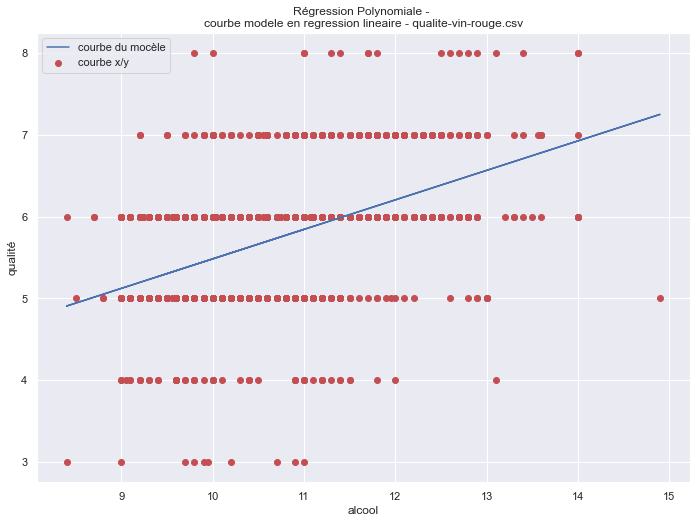

In [139]:
# Visualising the Linear Regression results
plt.scatter(X, y, color = 'r', label="courbe x/y")
plt.plot(X, lin_reg.predict(X), color = 'b', label="courbe du mocèle")

# titres et labels
plt.title("Régression Polynomiale - \ncourbe modele en regression lineaire - qualite-vin-rouge.csv")
plt.legend()
plt.xlabel("alcool")
plt.ylabel("qualité")
# sauvegarde :
plt.savefig('./graphiques/graph44_regPolynomiale_model_qualite-vin-rouge.png')

plt.show()

Créer votre modèle Regression polynomiale et entraînez le sur le jeu de données, essayer avec différentes valeurs pour le degré (1..5). Visualiser dans la même figure les rélutats du modèle pour les différents degrés. Quelle est la meilleure valeur pour le degré ?

In [140]:
poly_reg = PolynomialFeatures(degree = i)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))

degré = 1 , mse2= 210343822.8438184  Score=  0.22673436811275482
degré = 2 , mse2= 210343822.8438184  Score=  0.2279548369538248
degré = 3 , mse2= 210343822.8438184  Score=  0.23413543732332176
degré = 4 , mse2= 210343822.8438184  Score=  0.23414958505523376


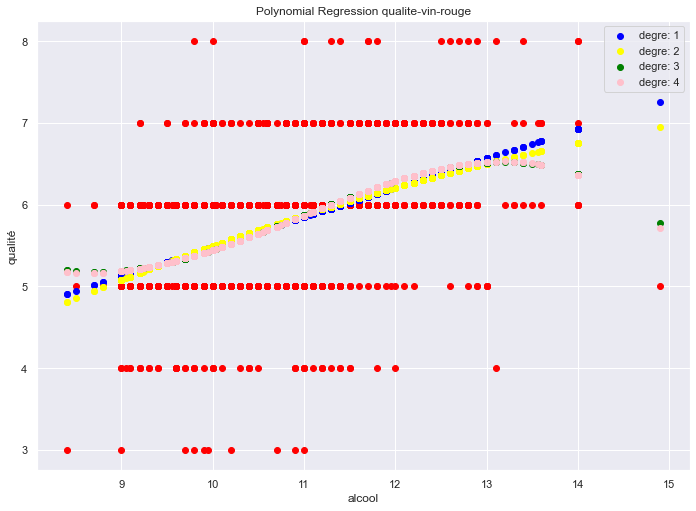

In [141]:
#from sklearn.preprocessing import PolynomialFeatures

colors=['blue','yellow','green','pink','black']
plt.scatter(X, y, color = 'red')

# print(X)
# print(y)
plt.title('Polynomial Regression qualite-vin-rouge')
plt.xlabel('alcool')
plt.ylabel('qualité')
#mse = []
for i in range(1,5):

    poly_reg = PolynomialFeatures(degree = i)
    X_poly = poly_reg.fit_transform(X)
    poly_reg.fit(X_poly, y)
    lin_reg_2 = LinearRegression()
    lin_reg_2.fit(X_poly, y)
    y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))
    plt.scatter(X, lin_reg_2.predict(poly_reg.fit_transform(X)), color = colors[i-1],label='degre: %s' %i)
    
    mse = mean_squared_error(y, y_pred)
    sc=r2_score(y, y_pred)

    print("degré =",i, ", mse2=", mse2, " Score= ", sc)
     
    
plt.legend() 
plt.savefig('./graphiques/graph45_regPolynomiale_Sklearn_Qualite_vin-rouge.png')

plt.show()

Faire la prédiction de la valeur 6 avec le modèle de régression linéaire simple et de régression polynomiale, qu'est ce que vous remarquez ?

In [142]:
valeur=np.array([6]).reshape(-1, 1)

# Predicting a new result with Linear Regression

print('Predicting a new result with Linear Regression')
print(lin_reg.predict(valeur))


print("=========================================================")
# Predicting a new result with Polynomial Regression

print('Predicting a new result with Polynomial Regression')
print(lin_reg_2.predict(poly_reg.fit_transform(valeur)))

Predicting a new result with Linear Regression
[[4.04002548]]
Predicting a new result with Polynomial Regression
[[6.72916109]]


In [146]:
poly_reg = PolynomialFeatures(degree = 1)
X_poly = poly_reg.fit_transform(X)
poly_reg.fit(X_poly, y)
lin_reg_2 = LinearRegression()
lin_reg_2.fit(X_poly, y)
y_pred = lin_reg_2.predict(poly_reg.fit_transform(X))
mse2 = mean_squared_error(y, y_pred)
print(mse2)
sc=r2_score(y, y_pred)
print("Score= ", sc)

0.5039840256714571
Score=  0.22673436811275482
